In [1]:
from dmml_project.models.create_model import create_model
import sklearn.metrics as metrics
from dmml_project.metrics import f1_score
from dmml_project.models.model import Model
from dmml_project import PROJECT_ROOT
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import json

KIND = "neural_network"

params = json.loads('''
{
    "network": "tnn_glove",
    "base_size": 16,
    "depth": 4,
    "epochs": 20,
    "patience": 2,
    "dropout": 0.6,
    "batchnorm": false,
    "batch_size": 32,
    "lr": 0.001,
    "optimizer": "adam"
}
''')

dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/train.tsv")
model: Model = create_model(kind=KIND, **params)

cpu


In [2]:
train, valid = dataset.sfold(0, 6)
history = model.train(train, valid=valid)
f1, cm = model.evaluate(valid, metric=lambda pred, true: (f1_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

Predicting:   0%|          | 0/1807 [00:00<?, ?it/s]C:\Users\the_E\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\transformer.py:384: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ..\aten\src\ATen\NestedTensorImpl.cpp:179.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)
Predicting: 100%|██████████| 1807/1807 [01:08<00:00, 26.44it/s, loss=0.898]


Training: 0.5974536136310061 Validation: 0.7336783589684158


Predicting: 100%|██████████| 1807/1807 [01:07<00:00, 26.91it/s, loss=0.842]


Training: 0.7280233492148236 Validation: 0.7642581473770567


Predicting: 100%|██████████| 1807/1807 [01:07<00:00, 26.61it/s, loss=0.78] 


Training: 0.7526660707663027 Validation: 0.7903213794639126


Epoch  4/20:  48%|████▊     | 4330/9035 [06:10<08:31,  9.19it/s, loss=0.863]

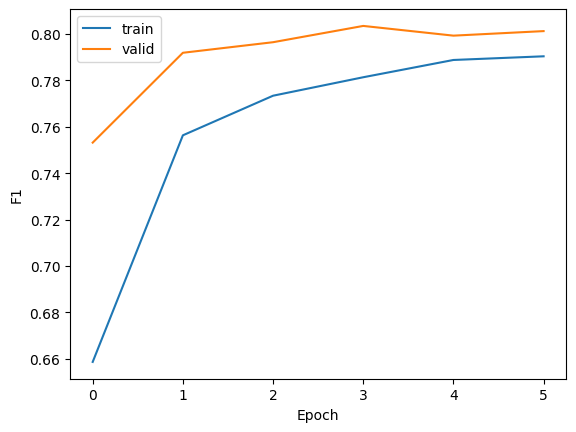

In [3]:
if KIND == "neural_network":
    train_f1, valid_f1 = history
    plt.plot(train_f1, label="train")
    plt.plot(valid_f1, label="valid")
    plt.xlabel("Epoch")
    plt.ylabel("F1")
    plt.legend()
    plt.show()

F1: 80.12%


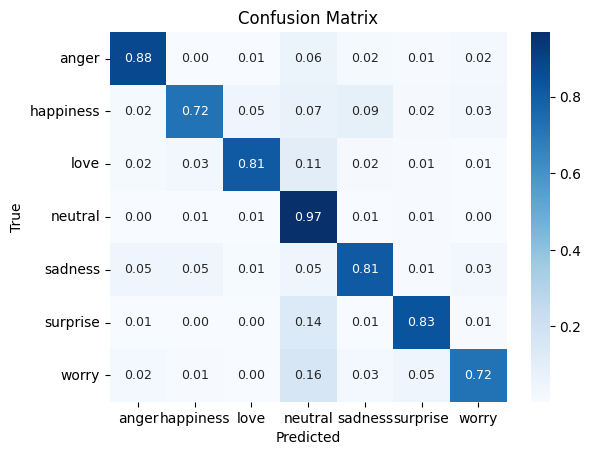

In [4]:
print(f"F1: {f1*100:.2f}%")
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9}, xticklabels=model.classes(), yticklabels=model.classes())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()